Accuracy: 0.895


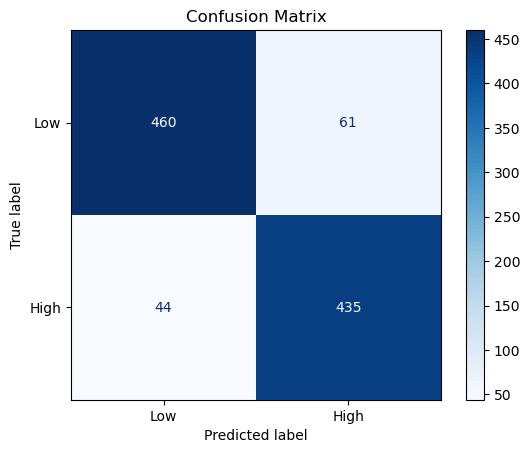

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load dataset
df = pd.read_csv('USA_Housing.csv')

# Create a binary target variable: 'High' if Price > median, else 'Low'
median_price = df['Price'].median()
df['PriceCategory'] = df['Price'].apply(lambda x: 'High' if x > median_price else 'Low')

# Features and target
X = df.drop(['Price', 'Address', 'PriceCategory'], axis=1)
y = LabelEncoder().fit_transform(df['PriceCategory'])

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Low", "High"])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()
